In [1]:
import pandas as pd

In [2]:
viol_place_df = pd.read_json("./place_violations_table.json")

In [3]:
viol_place_df

,place_id,place_type,total_violations
0,region_1,region,2086
1,district_1,district,1043
2,station_1,station,209
3,terminal_1,terminal,209
4,station_2,station,834
5,terminal_2,terminal,834
6,district_2,district,1043
7,station_3,station,626
8,terminal_3,terminal,282
9,terminal_4,terminal,344


In [4]:
import json

driver_patterns = None
with open("driver_patterns_v0.json") as json_file:
    driver_patterns = json.load(json_file)

In [5]:
driver_patterns

{'terminal_1': {'total_violations': 209,
  'drivers': {'driver_1': {'total_percentage': 1}}},
 'terminal_2': {'total_violations': 834,
  'drivers': {'driver_2': {'total_percentage': 0.2},
   'driver_3': {'total_percentage': 0.4},
   'driver_4': {'total_percentage': 0.4}}},
 'terminal_3': {'total_violations': 282,
  'drivers': {'driver_5': {'total_percentage': 0.5},
   'driver_6': {'total_percentage': 0.2},
   'driver_7': {'total_percentage': 0.3}}},
 'terminal_4': {'total_violations': 344,
  'drivers': {'driver_8': {'total_percentage': 1}}},
 'terminal_5': {'total_violations': 417,
  'drivers': {'driver_9': {'total_percentage': 1}}},
 'terminal_6': {'total_violations': 141,
  'drivers': {'driver_10': {'total_percentage': 0.3},
   'driver_11': {'total_percentage': 0.4},
   'driver_12': {'total_percentage': 0.3}}},
 'terminal_7': {'total_violations': 135,
  'drivers': {'driver_13': {'total_percentage': 0.4},
   'driver_14': {'total_percentage': 0.6}}},
 'terminal_8': {'total_violations':

In [6]:
for terminal in driver_patterns:
    total_violations = viol_place_df[viol_place_df["place_id"]==terminal].total_violations.values[0]
    driver_patterns[terminal]["total_violations"] = total_violations

In [7]:
from copy import deepcopy

driver_violations = deepcopy(driver_patterns)

for terminal in driver_violations:
    terminal_viol = driver_violations[terminal]["total_violations"]
    for driver in driver_violations[terminal]['drivers']:
        viol_per = driver_violations[terminal]['drivers'][driver]["total_percentage"]
        driver_violations[terminal]['drivers'][driver]["total_violations"] = round(terminal_viol * viol_per)

In [8]:
driver_violations

{'terminal_1': {'total_violations': 209,
  'drivers': {'driver_1': {'total_percentage': 1, 'total_violations': 209}}},
 'terminal_2': {'total_violations': 834,
  'drivers': {'driver_2': {'total_percentage': 0.2, 'total_violations': 167},
   'driver_3': {'total_percentage': 0.4, 'total_violations': 334},
   'driver_4': {'total_percentage': 0.4, 'total_violations': 334}}},
 'terminal_3': {'total_violations': 282,
  'drivers': {'driver_5': {'total_percentage': 0.5, 'total_violations': 141},
   'driver_6': {'total_percentage': 0.2, 'total_violations': 56},
   'driver_7': {'total_percentage': 0.3, 'total_violations': 85}}},
 'terminal_4': {'total_violations': 344,
  'drivers': {'driver_8': {'total_percentage': 1, 'total_violations': 344}}},
 'terminal_5': {'total_violations': 417,
  'drivers': {'driver_9': {'total_percentage': 1, 'total_violations': 417}}},
 'terminal_6': {'total_violations': 141,
  'drivers': {'driver_10': {'total_percentage': 0.3, 'total_violations': 42},
   'driver_11': 

In [9]:
driver_violation_table = []

for terminal in driver_violations:
    terminal_viol = driver_violations[terminal]["total_violations"]
    for driver in driver_violations[terminal]['drivers']:
        driver_violation_table.append({
            "driver_id": driver,
            "total_violations": driver_violations[terminal]['drivers'][driver]["total_violations"]
        })

In [10]:
driver_violation_table

[{'driver_id': 'driver_1', 'total_violations': 209},
 {'driver_id': 'driver_2', 'total_violations': 167},
 {'driver_id': 'driver_3', 'total_violations': 334},
 {'driver_id': 'driver_4', 'total_violations': 334},
 {'driver_id': 'driver_5', 'total_violations': 141},
 {'driver_id': 'driver_6', 'total_violations': 56},
 {'driver_id': 'driver_7', 'total_violations': 85},
 {'driver_id': 'driver_8', 'total_violations': 344},
 {'driver_id': 'driver_9', 'total_violations': 417},
 {'driver_id': 'driver_10', 'total_violations': 42},
 {'driver_id': 'driver_11', 'total_violations': 56},
 {'driver_id': 'driver_12', 'total_violations': 42},
 {'driver_id': 'driver_13', 'total_violations': 54},
 {'driver_id': 'driver_14', 'total_violations': 81},
 {'driver_id': 'driver_15', 'total_violations': 157},
 {'driver_id': 'driver_16', 'total_violations': 281},
 {'driver_id': 'driver_17', 'total_violations': 121},
 {'driver_id': 'driver_18', 'total_violations': 68},
 {'driver_id': 'driver_19', 'total_violations

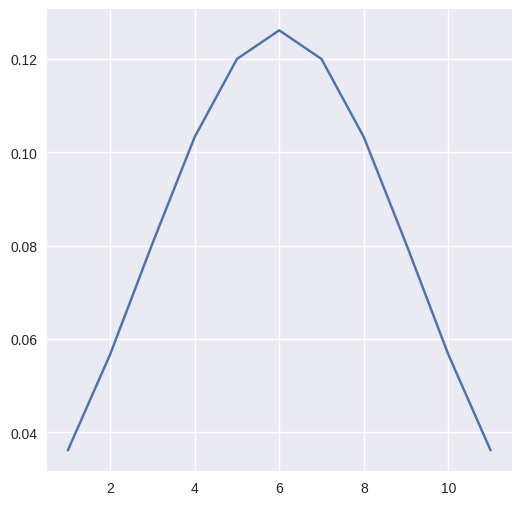

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# A custom function to calculate
# probability distribution function
def pdf(x):
    mean = np.mean(x)
    std = np.std(x)
    y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))
    return y_out
    
# To generate an array of x-values
x = np.arange(1, 12, 1)
  
# To generate an array of
# y-values using corresponding x-values
y = pdf(x)

# sum(y)
# Plotting the bell-shaped curve
# plt.style.use('seaborn')
plt.figure(figsize = (6, 6))
plt.plot(x, y)
  
# # plt.scatter( x, y, marker = 'o', s = 25, color = 'red')
# plt.show()

In [12]:
import random
  
def random_distribution(count, total=1, sort=False, order='asc'):
    r = [random.random() for i in range(count)]
    if sort:
        r.sort(reverse=True if order == 'desc' else False)
    s = sum(r)
    r = [ round((i/s)*total, 2) for i in r ]
    return r



In [13]:
months = [i+1 for i in range(12)]
hours = [i for i in range(24)]
durations = [i+1 for i in range(8)]
duration_probs = [0.25, 0.24, 0.21, 0.09, 0.08, 0.07, 0.05, 0.01]
month_probs = [0.08, 0.1, 0.07, 0.1, 0.02, 0.08, 0.02, 0.04, 0.09, 0.1, 0.2, 0.1]
days_in_months = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
hours_probs = [0.14, 0.1, 0.02, 0.03, 0.02, 0.03, 0.03, 0.01, 0.0, 0.03, 0.01, 0.02, 0.01, 0.0, 0.03, 0.03, 0.03, 0.0, 0.04, 0.01, 0.03, 0.03, 0.17, 0.18]

In [14]:
from datetime import datetime, timedelta

driver_violation_ranges = []

for driver_viol in driver_violation_table:
    driver_id = driver_viol["driver_id"]
    total_violations = driver_viol["total_violations"]
    viol_months = np.random.choice(months, p=month_probs, size=(total_violations))
    viol_hours = np.random.choice(hours, p=hours_probs, size=(total_violations))
    viol_durations = np.random.choice(durations, p=duration_probs, size=(total_violations))
    for i in range(total_violations):
        month = viol_months[i]
        day =  random.randint(1, days_in_months[month-1])
        hour = viol_hours[i]
        min = random.randint(0, 50)
        start_time = datetime(year=2022, month=month, day=day, hour=hour, minute=min)
        duration_hours = viol_durations[i].item()
        end_time = start_time + timedelta(hours=duration_hours)
        start_time_str = start_time.strftime("%Y-%m-%dT%H:%M")
        end_time_str = end_time.strftime("%Y-%m-%dT%H:%M")
        driver_violation_ranges.append({
            "driver_id": driver_id,
            "start": start_time_str,
            "end": end_time_str,
            "duration": duration_hours
        })

In [15]:
with open("./driver_violation_ranges_v0.json", "w") as outfile:
    json.dump(driver_violation_ranges, outfile)

In [16]:
viol_hours = np.random.choice(hours, p=hours_probs, size=(100))

In [17]:
unique_values, counts = np.unique(viol_hours, return_counts=True)

In [18]:
unique_values, counts

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 14, 16, 18, 20, 21,
        22, 23]),
 array([16,  6,  4,  3,  5,  2,  2,  1,  4,  2,  2,  3,  2,  2,  6,  3,  1,
        20, 16]))

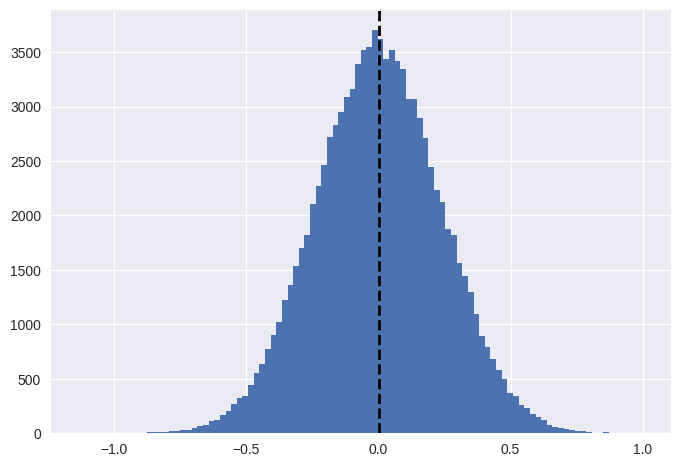

In [21]:
import numpy as np
import matplotlib.pyplot as plt
  
# Mean of the distribution
Mean = 0
 
# satndard deviation of the distribution
Standard_deviation  = 1
  
# size
size = 100000
  
# creating a normal distribution data
values = np.random.normal(Mean, Standard_deviation, size)
max_val = values.max()
values = values/max_val
# plotting histograph
plt.hist(values, 100)
# plotting mean line
plt.axvline(values.mean(), color='k', linestyle='dashed', linewidth=2)
plt.show()
# plt.style.use('seaborn')
# plt.figure(figsize = (6, 6))
# y = np.arange(-1, 1, 2/size)
# plt.plot(values, y)

In [62]:
# A custom function to calculate
# probability distribution function
def pdf(x, mean=None):
    if mean is None:
        mean = np.mean(x)
    std = np.std(x)
    y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))
    return y_out

def get_bell_for_week(peak_around_day=4):
    x = np.arange(1, 8, 1)
    probs = pdf(x, peak_around_day)
    s = sum(probs)
    diff = (1 - sum(probs))/7
    probs += diff
    return x, probs

def get_bell_for_month(month, year, peak_around_day=23):
    is_leap_year = year%4 == 0
    if is_leap_year and month == 2:
        no_of_days = 29
    else:
        days_in_months = [21, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
        no_of_days = days_in_months[month-1]
    x = np.arange(1, no_of_days+1, 1)
    probs = pdf(x, peak_around_day)
    s = sum(probs)
    diff = (1 - sum(y))/no_of_days
    probs += diff
    return x, probs

def get_bell_for_year(peak_around_month=11):
    x = np.arange(1, 13, 1)
    probs = pdf(x, peak_around_month)
    s = sum(probs)
    diff = (1 - sum(probs))/12
    probs += diff
    return x, probs

def random_distribution(count, total=1, sort=False, order='asc'):
    r = [random.random() for i in range(count)]
    if sort:
        r.sort(reverse=True if order == 'desc' else False)
    s = sum(r)
    r = [ round((i/s)*total, 2) for i in r ]
    return r

In [63]:
x, y = get_bell_for_week(5)
yr = random_distribution(7)

# Plotting the bell-shaped curve
plt.style.use('seaborn')
plt.figure(figsize = (6, 6))
plt.plot(x, y)
plt.plot(x, yr, color='r')
sum(y)

NameError: name 'random' is not defined

/tmp/ipykernel_8354/563262135.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


0.9165641725240911

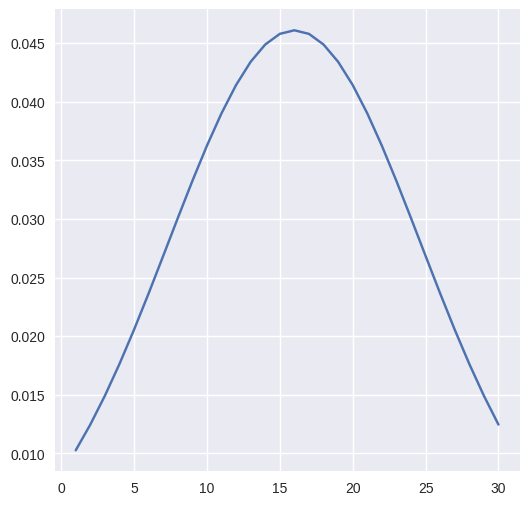

In [58]:
x, y = get_bell_for_month(11, 2022, 16)

# Plotting the bell-shaped curve
plt.style.use('seaborn')
plt.figure(figsize = (6, 6))
plt.plot(x, y)
sum(y)

/tmp/ipykernel_8354/1896235111.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


1.0000000000000002

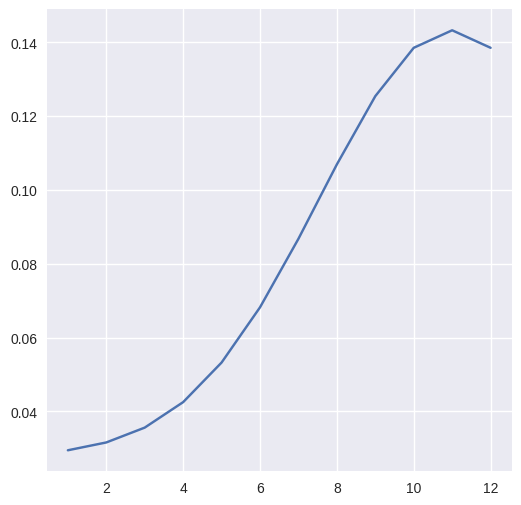

In [60]:
x, y = get_bell_for_year()

# Plotting the bell-shaped curve
plt.style.use('seaborn')
plt.figure(figsize = (6, 6))
plt.plot(x, y)
sum(y)

0.016391219997142856